In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, KernelDensity

from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
plt.style.use("ggplot")

### **Nonparametric Techniques**

In [3]:
# Ejercicio 3

In [4]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = iris.data
y = iris.target

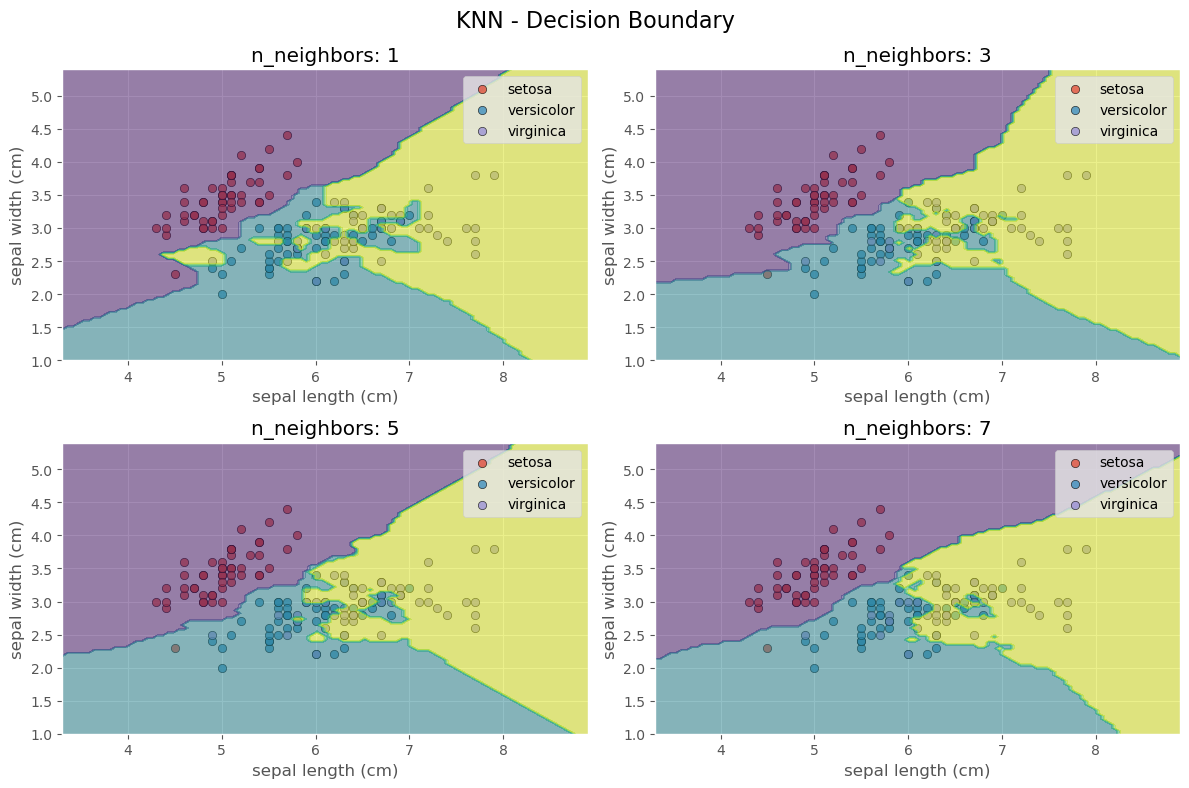

In [6]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

fig.suptitle("KNN - Decision Boundary", fontsize=16)

for ax, n_neighbors in zip([ax1, ax2, ax3, ax4], [1, 3, 5, 7]):

    for class_idx, class_name in enumerate(iris.target_names):
        ax.scatter(
            X[y == class_idx, 0],
            X[y == class_idx, 1],
            label=class_name,
            edgecolors="k",
            alpha=0.75
        )

    clf = make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors)
    )
    clf.fit(X[:, [0, 1]], y)

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X[:, [0, 1]],
        response_method="predict",
        alpha=0.5,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )

    ax.set_title(f"n_neighbors: {n_neighbors}")

    ax.legend()
    
plt.tight_layout()

plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

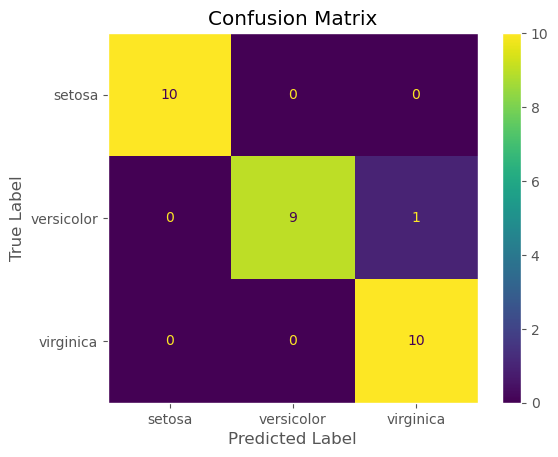

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [8]:
# Naive Bayes

clf = make_pipeline(
    StandardScaler(),
    GaussianNB()
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
cm.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred, target_names=iris.target_names))

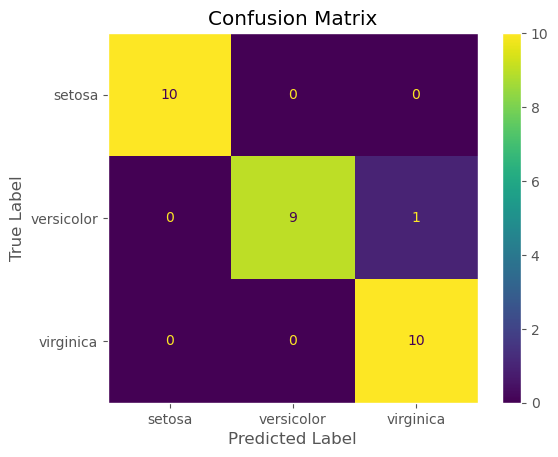

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
# K-Nearest Neighbors

clf = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(
        n_neighbors=11
    )
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
cm.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [10]:
# Ejercicio 4

In [11]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    """
    Bayesian generative classification based on KDE.
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class.
    kernel : str
        the kernel name, passed to KernelDensity.
    """
    
    def __init__(self, bandwidth=1.0, kernel="gaussian"):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [12]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [13]:
X = digits.data
y = digits.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

In [15]:
bandwidth = np.logspace(0, 2, 100)

clf = GridSearchCV(
    KDEClassifier(),
    param_grid={
        "bandwidth": bandwidth,
    }
)
clf.fit(X_train, y_train)

print("KDEClassifier")
print(f"Best Parameters: {clf.best_params_}")
print(f"Test Acurracy  : {clf.score(X_test, y_test):.2f}")

KDEClassifier
Best Parameters: {'bandwidth': 4.0370172585965545}
Test Acurracy  : 0.99


---------------------------- KDEClassifier ----------------------------


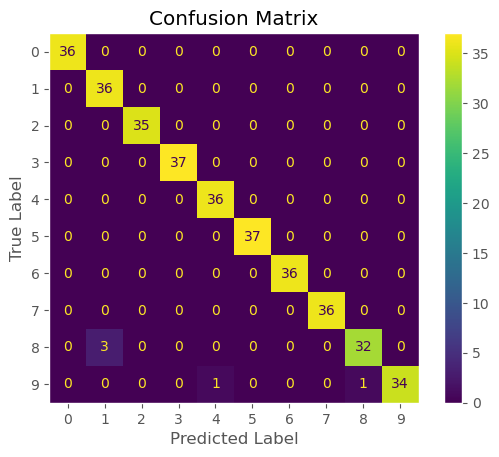

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [16]:
y_pred = clf.predict(X_test)

print("-"*28 + " KDEClassifier " + "-"*28)

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
cm.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred))

----------------------------- Naive Bayes -----------------------------


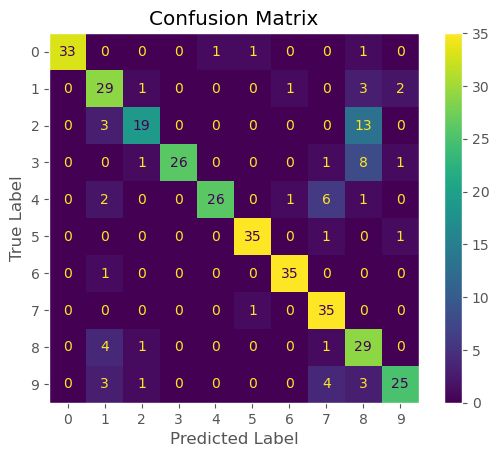

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.69      0.81      0.74        36
           2       0.83      0.54      0.66        35
           3       1.00      0.70      0.83        37
           4       0.96      0.72      0.83        36
           5       0.95      0.95      0.95        37
           6       0.95      0.97      0.96        36
           7       0.73      0.97      0.83        36
           8       0.50      0.83      0.62        35
           9       0.86      0.69      0.77        36

    accuracy                           0.81       360
   macro avg       0.85      0.81      0.81       360
weighted avg       0.85      0.81      0.82       360



In [17]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("-"*29 + " Naive Bayes " + "-"*29)

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
cm.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred))